In [199]:
from budyko import curves as bc
import matplotlib.patches as ptchs
import palettable.tableau as pt

In [4]:
n = 50
PET_P = np.linspace(0,4,n, endpoint=True)
P = np.linspace(0,2,n, endpoint=True)

In [5]:
PET = PET_P * P

In [13]:
X = np.array([P,PET])

In [14]:
w = 0.5
ET_P = bc.zhang(X,w)

In [143]:
# code to generate data points and errors to add to them
#idx = np.random.randint(low=0,high=n,size=m)
#error = np.random.normal(loc=0,scale=0.05,size=m)
#np.save('./data/example_buydko_error.npy',error)
#np.save('./data/example_buydko_index.npy',idx)

# load the data point index values and errors generated above
idx = np.load('./data/example_buydko_index.npy')
error = np.load('./data/example_buydko_error.npy')

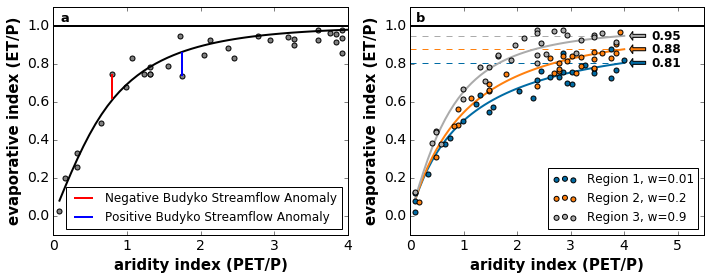

In [239]:
fig = plt.figure(figsize=(10,4))


ax1 = fig.add_subplot(121)
m = 30
s = 25
ET_P = bc.budyko(X)
#idx = np.random.randint(low=0,high=n,size=m)
#error = np.random.normal(loc=0,scale=0.05,size=m)

ET_P2 = ET_P[idx]
ET_P2 = ET_P[idx]+error
ET_P2[ET_P2>0.98] = 0.98
ET_P2[ET_P2<0.02] = 0.02
ax1.scatter(PET_P[idx],ET_P2,s=s,c='0.5')
ax1.plot(PET_P,ET_P,'-k',lw=2)

minymin=0.6
minymax=0.7
minx = 0.8

maxymin = 0.7
maxymax = 0.8
maxx = 1.75

ax1.axvline(x=minx,ymin=minymin,ymax=minymax,color='r',lw=2,zorder=10, label='Negative Budyko Streamflow Anomaly')
ax1.axvline(x=maxx,ymin=maxymin,ymax=maxymax,color='b',lw=2,zorder=10, label='Positive Budyko Streamflow Anomaly')

xx = np.array([minx,maxx])
yy = np.array([minymax+0.045,maxymin+0.035])

ax1.scatter(xx,yy,s=s,facecolor='0.5')

plt.xlim(0,4)
plt.ylim(-0.1,1.1)
ax1.axhline(1,lw=2,c='k')
plt.xlabel('aridity index (PET/P)',fontsize=15, fontweight='bold')
plt.ylabel('evaporative index (ET/P)',fontsize=15, fontweight='bold')
ax1.set_xticks([0,1,2,3,4])
ax1.tick_params(labelsize=14)
ax1.text(0.1,1.02,'a', fontsize=13, fontweight='bold')
plt.legend(loc='lower right')

m = 30
s = 25
ws = [0.01,0.2,0.9]
#cs = ['b','g','r']
cs = pt.ColorBlind_10.mpl_colors[0:3]
ax2 = fig.add_subplot(122)
regs = [1,2,3]
for w,c,r in zip(ws,cs,regs):
    idx2 = np.random.randint(low=0,high=n,size=m)
    error2 = np.random.normal(loc=0,scale=0.05,size=m)
    ET_P = bc.zhang(X,w)
    ax2.plot(PET_P,ET_P,'-',c=c,lw=2)
    
    ET_P22 = ET_P[idx2]+error2
    ET_P22[ET_P22>0.98] = 0.98
    ET_P22[ET_P22<0.02] = 0.02
    
    ax2.scatter(PET_P[idx2],ET_P22,s=s,c=c,zorder=10,label='Region %s, w=%s'%(r,w))
    
    
    asym = np.nanmax(ET_P)
    ax2.add_patch(ptchs.Arrow(4.4,np.nanmax(ET_P),-0.3,0,width=0.08,facecolor=c,zorder=3));
    ax2.axhline(y=asym,xmin=0,xmax=4./5.5,color=c,zorder=1,ls='--')
    ax2.text(4.5,asym-0.02,round(asym,2), fontsize=12, fontweight='bold')

plt.xlim(0,5.5)
plt.ylim(-0.1,1.1)
ax2.axhline(1,lw=2,c='k')
plt.xlabel('aridity index (PET/P)',fontsize=15, fontweight='bold')
plt.ylabel('evaporative index (ET/P)',fontsize=15, fontweight='bold')
ax2.tick_params(labelsize=14)
ax2.text(0.1,1.02,'b', fontsize=13, fontweight='bold')
plt.legend(loc='lower right')

plt.tight_layout()

plt.savefig('./figures/submission2_budyko_example.png',bbox_inches='tight',dpi=300)
plt.savefig('./figures/submission2_budyko_example.pdf',bbox_inches='tight')

In [202]:
pt.ColorBlind_10.mpl_colors

[(0.0, 0.4196078431372549, 0.6431372549019608),
 (1.0, 0.5019607843137255, 0.054901960784313725),
 (0.6705882352941176, 0.6705882352941176, 0.6705882352941176),
 (0.34901960784313724, 0.34901960784313724, 0.34901960784313724),
 (0.37254901960784315, 0.6196078431372549, 0.8196078431372549),
 (0.7843137254901961, 0.3215686274509804, 0.0),
 (0.5372549019607843, 0.5372549019607843, 0.5372549019607843),
 (0.6352941176470588, 0.7843137254901961, 0.9254901960784314),
 (1.0, 0.7372549019607844, 0.4745098039215686),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529)]

In [146]:
anom = ET_P[idx]-ET_P2

In [206]:
miny = ET_P2[anom==anom.min()]
minx = PET_P[idx][anom==anom.min()]
minerr = error[anom==anom.min()]
maxy = ET_P2[anom==anom.max()]
maxx = PET_P[idx][anom==anom.max(1)]
maxerr = error[anom==anom.max(1)]

ValueError: 'axis' entry is out of bounds